In [7]:
import pandas as pd
import altair as alt
import numpy as num
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

In [41]:
#Loading the data
last_campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv')
last_campaign

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1
4116,27,student,single,high.school,no,no,no,cellular,may,mon,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1


In [8]:
#Changing alphabetical to numerical for some columns
campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
campaign["y"].replace(["yes"],1,inplace= True)
campaign["y"].replace(["no"],0,inplace= True)
campaign["housing"].replace(["yes"],1,inplace= True)
campaign["housing"].replace(["no"],0,inplace= True)
campaign["loan"].replace(["yes"],1,inplace= True)
campaign["loan"].replace(["no"],0,inplace= True)




In [40]:
#This will show the number of times someone was contacted from preivious campaigns 
campaign.groupby("campaign").sum()


,age,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
campaign,,,,,,,,,
1,707120,16832804,3627,-2064.5,1649797.020,-713481.7,60502.019,91007016.7,2300
2,422450,10119635,1998,341.4,989032.942,-427894.9,37822.925,54589941.4,1211
3,212708,5179760,734,1499.3,500092.005,-216050.4,20348.156,27639448.0,574
4,105940,2595755,341,809.1,248245.680,-107865.2,10133.617,13722537.6,249
5,64172,1569604,172,497.6,149687.787,-65177.3,6116.903,8279916.3,120
6,39520,958160,129,319.4,91680.384,-40161.0,3744.013,5070063.9,75
7,25228,619428,59,305.6,58910.877,-25594.9,2515.672,3261810.1,38
8,15754,393645,35,219.6,37482.025,-16468.4,1617.697,2075949.8,17
9,11511,282717,11,227.1,26526.758,-11336.2,1231.874,1471150.4,17


In [10]:
#this is the dataset containing only the "yes" answers in the column "y"
yes = campaign.loc[campaign["y"] == 1]


In [54]:
#Days of the week and the total of "Yes" for each day.
week_days_orderer = ['mon','tue', 'wed','thu','fri']
chart = (alt.Chart(yes,title = "My chart")
            .encode(
                x = alt.X('day_of_week', axis = alt.Axis(title = "Days of the Week"),sort = week_days_orderer ),
                y = alt.Y('count(y)', axis = alt.Axis(title = "Results"),                
                ) 
    ).properties(
    width=300,
    height = 200,)
    .mark_bar())
chart

alt.Chart(...)

In [36]:
#A data set where it shows only the single people who had "yes" in the "y" column
single = yes.loc[yes["marital"] == "single"]
single

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
388,28,unknown,single,unknown,unknown,1,1,telephone,may,tue,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
820,31,admin.,single,university.degree,no,0,0,telephone,may,wed,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,1
832,28,student,single,basic.9y,unknown,1,1,telephone,may,wed,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,1
870,37,blue-collar,single,basic.9y,unknown,1,0,telephone,may,wed,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,1
1189,46,blue-collar,single,basic.9y,no,1,0,telephone,may,thu,3,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41134,25,student,single,high.school,no,0,0,cellular,nov,thu,1,999,0,nonexistent,-1.1,94.767,-50.8,1.041,4963.6,1
41145,26,admin.,single,university.degree,no,0,0,cellular,nov,fri,3,999,0,nonexistent,-1.1,94.767,-50.8,1.040,4963.6,1
41147,25,technician,single,professional.course,no,1,0,cellular,nov,fri,2,19,1,success,-1.1,94.767,-50.8,1.040,4963.6,1
41148,35,admin.,single,professional.course,no,1,0,cellular,nov,fri,3,999,0,nonexistent,-1.1,94.767,-50.8,1.040,4963.6,1


In [55]:
#this is grouping all the asnweres based on the day of the week and summing them.
single1 = single.groupby("day_of_week").sum()
single1

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
day_of_week,,,,,,,,,,
fri,9961,680,252116,153,-489.9,29565.094,-12502.1,573.428,1610579.6,317
mon,8832,598,227078,127,-412.8,25661.137,-11203.5,507.725,1398563.7,275
thu,11850,735,281322,195,-535.8,35095.133,-15275.6,686.289,1911699.8,376
tue,10146,653,254264,179,-485.6,31078.892,-13140.8,621.559,1691957.5,333
wed,9996,548,251112,167,-395.4,29785.900,-12875.5,665.508,1625179.7,319


<AxesSubplot:ylabel='y'>

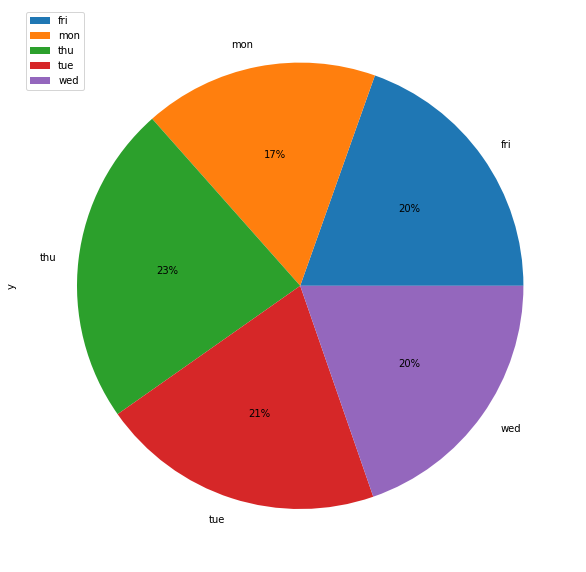

In [13]:
explode = (0.05, 0.05, 0.05)
single1.plot(kind='pie', y='y', 
  autopct='%1.0f%%',figsize = (10,50))

In [14]:
#FRANCISCO, VP OF MARKETIG: Does it make sense to call students?
#Answer: Yes, it seems that the more education someone have the more loands they get.
#Here I am grouping all the answers with the count for each. This way I can see which group should be contacted.
education = yes.groupby(["education"]).count()
#This is just so the data is sorted
education.sort_values(by="age")

,age,job,marital,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,,,,,,,,,
illiterate,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
basic.6y,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188
unknown,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251
basic.4y,428,428,428,428,428,428,428,428,428,428,428,428,428,428,428,428,428,428,428
basic.9y,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473,473
professional.course,595,595,595,595,595,595,595,595,595,595,595,595,595,595,595,595,595,595,595
high.school,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031,1031
university.degree,1670,1670,1670,1670,1670,1670,1670,1670,1670,1670,1670,1670,1670,1670,1670,1670,1670,1670,1670


<AxesSubplot:ylabel='y'>

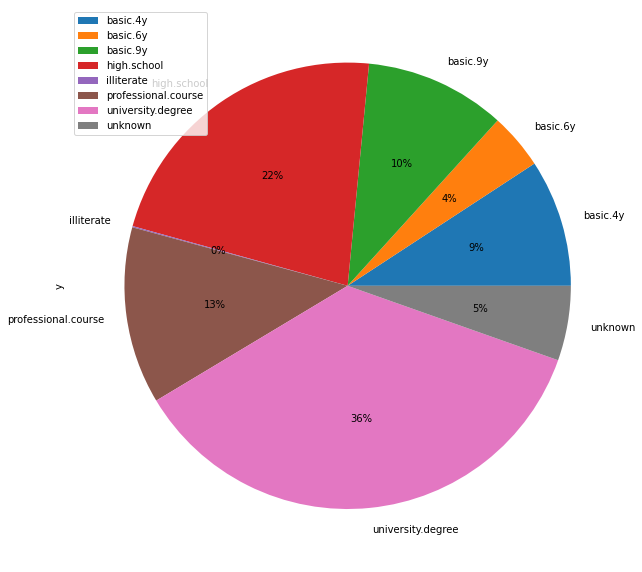

In [15]:
explode = (0.05, 0.05, 0.05)
education.plot(kind='pie', y='y', 
  autopct='%1.0f%%',figsize = (10,50))

In [16]:
#getting the results for the days of the week.
education = yes.groupby(["day_of_week"]).count()
#This is just so the data is sorted
education.sort_values(by="age")

,age,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
day_of_week,,,,,,,,,,,,,,,,,,,
fri,846,846,846,846,846,846,846,846,846,846,846,846,846,846,846,846,846,846,846
mon,847,847,847,847,847,847,847,847,847,847,847,847,847,847,847,847,847,847,847
wed,949,949,949,949,949,949,949,949,949,949,949,949,949,949,949,949,949,949,949
tue,953,953,953,953,953,953,953,953,953,953,953,953,953,953,953,953,953,953,953
thu,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045


In [17]:
features = ["age","marital","housing","loan"]
X = pd.get_dummies(campaign[features])
y = campaign["y"]

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

#build the decision tree
classifier = DecisionTreeClassifier()

#train it

classifier.fit(X_train,y_train)

#Test it

classifier.score(X_test,y_test)

0.8884842599336409

In [19]:
test = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv")
final = test.head(1).values
final

array([[56, 'housemaid', 'married', 'basic.4y', 'no', 'no', 'no',
        'telephone', 'may', 'mon', 1, 999, 0, 'nonexistent', 1.1, 93.994,
        -36.4, 4.857, 5191.0, 'no']], dtype=object)

In [20]:
classifier.predict[final]

TypeError: 'method' object is not subscriptable

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

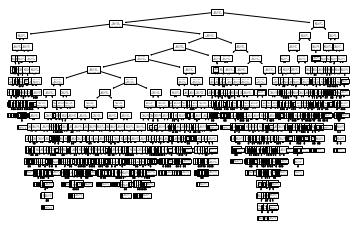

In [ ]:

fig ,ax = plt.subplots(figsize = (20,20))
tree.plot_tree(classifier, fontsize=10, feature_names=X.columns)
plt.show()

In [ ]:
test = 0